In [ ]:
import numpy as np
import pandas as pd

### 검증 데이터 세트를 이용하여 학습 수행
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit() iteration시 검증 데이터로 성능을 확인할 수 있다.

In [ ]:
# tf.keras에서 fashion_mnist 데이터 다운로드
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# 데이터 전처리
def data_preprocess(images, labels):

    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

In [ ]:
# 전처리 적용
train_images, train_labels = data_preprocess(train_images, train_labels)
test_images, test_labels =data_preprocess(test_images, test_labels)

In [ ]:
# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
from sklearn.model_selection import train_test_split
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.15, random_state = 2024)

print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)


In [ ]:
# tr_labels, val_labels에 OHE 적용
from tensorflow.keras.utils import to_categorical

tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

after OHE: (51000, 10) (9000, 10)


In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

# Flatten, 3개의 Dense(relu, relu, softmax) 층 쌓기

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# 최적화함수(Adam), 손실함수(categorical_crossentropy), 평가지표(accuracy)
model.compile(Adam(0.01), 'categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### 검증 데이터 세트를 적용하여 학습 수행

In [ ]:
# 모델 학습(batch size=128, 검증데이터 사용, epochs=20)
history =  model.fit(tr_images, tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 5s 6ms/step - loss: 0.6209 - accuracy: 0.7879 - val_loss: 0.4600 - val_accuracy: 0.8419
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4160 - accuracy: 0.8541 - val_loss: 0.4141 - val_accuracy: 0.8580
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3794 - accuracy: 0.8660 - val_loss: 0.3933 - val_accuracy: 0.8602
Epoch 4/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3517 - accuracy: 0.8751 - val_loss: 0.3734 - val_accuracy: 0.8650
Epoch 5/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3362 - accuracy: 0.8791 - val_loss: 0.3922 - val_accuracy: 0.8561
Epoch 6/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3208 - accuracy: 0.8830 - val_loss: 0.3678 - val_accuracy: 0.8668
Epoch 7/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3066 - accuracy: 0.8875 - val_loss: 0.3526 - val_accuracy: 0.8739
Epoch 

In [ ]:
# loss, accuracy, val_loss, val_accuracy 확인하기
import matplotlib.pyplot as plt

print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.6209260821342468, 0.41600582003593445, 0.3794260025024414, 0.35173431038856506, 0.33619827032089233, 0.3207620680332184, 0.3066251277923584, 0.29643961787223816, 0.2838563621044159, 0.2750706374645233, 0.26748302578926086, 0.26038867235183716, 0.25233885645866394, 0.24839581549167633, 0.23853330314159393, 0.23631435632705688, 0.23037400841712952, 0.2247329205274582, 0.21669533848762512, 0.21361249685287476]
[0.7879215478897095, 0.8541176319122314, 0.8659999966621399, 0.8750784397125244, 0.8791176676750183, 0.8830000162124634, 0.8874902129173279, 0.8914313912391663, 0.8957450985908508, 0.8985490202903748, 0.9009019732475281, 0.9025882482528687, 0.9069607853889465, 0.9088627696037292, 0.9116863012313843, 0.9118039011955261, 0.9146862626075745, 0.9157646894454956, 0.9190980195999146, 0.9214117527008057]
[0.4599997401237488, 0.414141982793808, 0.3933328688144684, 0.3733551800251007, 0.3921756148338318, 0.3677736520767212, 0.3526410758495331, 0.34705087542533875, 0.329938143491745, 0.338

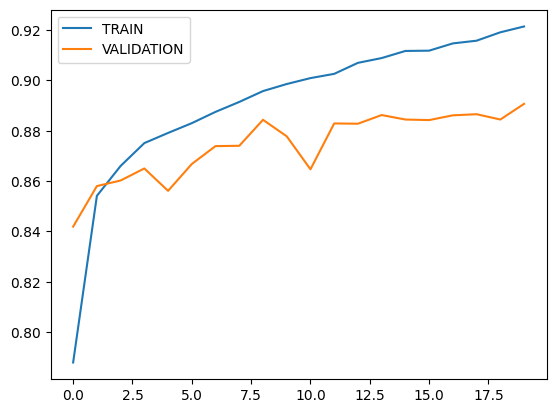

In [ ]:
# 훈련 데이터, 검증 데이터의 정확도 시각화

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='TRAIN')
plt.plot(history.history['val_accuracy'], label='VALIDATION')

plt.legend()
plt.show()
